In [215]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Імпортування даних

In [216]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\survey_results_public.csv'
dataset = pd.read_csv(path)
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Interactive tutorial;Certification videos",...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microser

Перевірка на NaN

In [217]:
dataset.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

Створення окремого DataFrame, який я використовуватиму

In [274]:
df = dataset[['ResponseId', 'EdLevel', 'LanguageHaveWorkedWith', 'WorkExp', 'ConvertedCompYearly']]
df = df.dropna(subset=['ConvertedCompYearly'])
df = df.dropna(subset=['LanguageHaveWorkedWith'])
df = df.dropna(subset=['WorkExp'])
df['EdLevel'] = df['EdLevel'].astype('category')
df.rename({'ConvertedCompYearly': 'Salary'}, axis=1, inplace=True)
df.head()

,ResponseId,EdLevel,LanguageHaveWorkedWith,WorkExp,Salary
1,2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;Python,10.0,285000.0
2,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go,23.0,250000.0
3,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript,7.0,156000.0
4,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;TypeScript,6.0,23456.0
5,6,Some college/university study without earning a degree,Bash/Shell (all shells);HTML/CSS;JavaScript;Ruby;SQL;TypeScript,22.0,96828.0


Створенння списку з мовами

In [219]:
unique_languages = set(x.strip() for my_list in df['LanguageHaveWorkedWith'].dropna() for x in my_list.split(';'))
unique_languages

{'APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zig'}

In [220]:
df.isna().sum()

ResponseId                0
EdLevel                   0
LanguageHaveWorkedWith    0
WorkExp                   0
Salary                    0
dtype: int64

Відокремлення заробітньої плати по знанням мов у новий Dataframe

In [269]:
df_sal = df.loc[:, ['LanguageHaveWorkedWith', 'Salary']]
lim2 = np.abs((df_sal.Salary - df_sal.Salary.mean()) / df_sal.Salary.std(ddof=0)) < 3
df_sal = df_sal.where(lim2, np.nan)
df_sal = df_sal.dropna()

In [271]:
data_for_langue = pd.Series([[] for _ in range(len(unique_languages))], index=unique_languages)

for i in range(df_sal.shape[0]-1):
    curr_row = df_sal.iloc[i]
    for j in unique_languages:
        if j in curr_row['LanguageHaveWorkedWith']:
            data_for_langue.at[j].append(curr_row['Salary'])
        else:
            data_for_langue.at[j].append(pd.NA)

salary_per_langue = data_for_langue.to_frame(name="0")
salary_per_langue = salary_per_langue['0'].apply(pd.Series)
salary_per_langue["mean"] = salary_per_langue.mean(axis=1, skipna=True)
salary_per_langue["Language"] = [i for i in unique_languages]
salary_per_langue.T.head()


,Nim,Erlang,Flow,C,APL,PHP,Delphi,MATLAB,GDScript,Java,...,Julia,OCaml,Objective-C,F#,PowerShell,Crystal,Cobol,Scala,Lisp,Ruby
0,<NA>,<NA>,<NA>,285000.0,<NA>,<NA>,<NA>,<NA>,<NA>,285000.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,156000.0,<NA>,156000.0,<NA>,<NA>,<NA>,156000.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,156000.0
3,<NA>,<NA>,<NA>,23456.0,<NA>,<NA>,<NA>,<NA>,<NA>,23456.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,96828.0,<NA>,<NA>,<NA>,<NA>,<NA>,96828.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96828.0


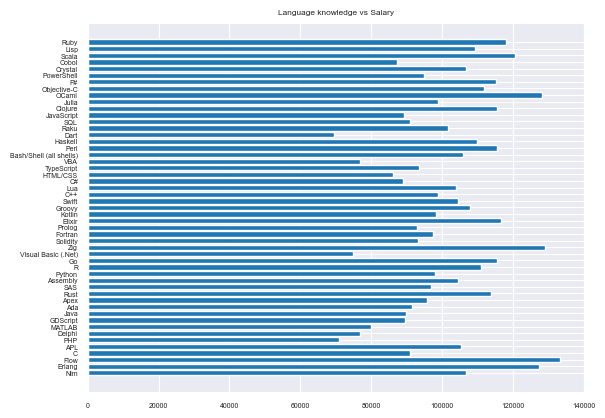

In [272]:
plt.rcParams.update({'font.size': 5})
plt.barh(y=salary_per_langue["Language"], width=salary_per_langue["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

In [223]:
df2 = salary_per_langue.loc[["Python", "C++", "Java"]]
df2.T.loc['mean'].sort_values(ascending=False)

C++       114733.582038
Python    110040.302739
Java       97226.056936
Name: mean, dtype: object

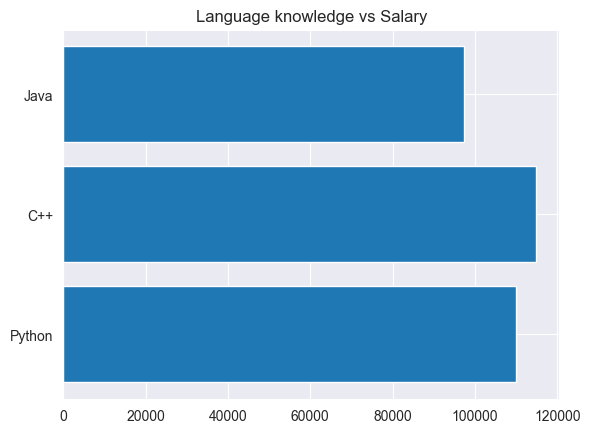

In [224]:
plt.rcParams.update({'font.size': 10})
plt.barh(y=df2["Language"], width=df2["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

Групування заробітної плати за рівнем освіти у Series

In [259]:
df_ed_mean = df.loc[:, ['EdLevel', 'Salary']]
lim1 = np.abs((df_ed_mean.Salary - df_ed_mean.Salary.mean()) / df_ed_mean.Salary.std(ddof=0)) < 3
df_ed_mean = df_ed_mean.where(lim1, np.nan)
df_ed_mean = df_ed_mean.dropna()

In [260]:
df_ed_mean = df_ed_mean.groupby('EdLevel', observed=True)['Salary'].mean()
df_ed_mean

EdLevel
Associate degree (A.A., A.S., etc.)                                                    89202.308333
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           94395.789238
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        92283.097155
Primary/elementary school                                                              88594.122137
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        105219.987234
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     72562.722032
Some college/university study without earning a degree                                 86482.356003
Something else                                                                         69806.411043
Name: Salary, dtype: float64

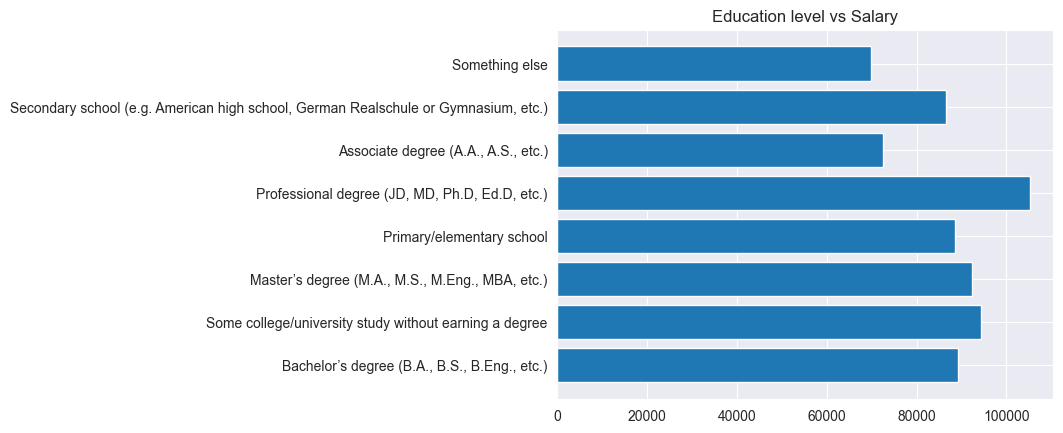

In [261]:
plt.rcParams.update({'font.size': 10})
plt.barh(y=df['EdLevel'].unique(), width=df_ed_mean)
plt.title('Education level vs Salary')
plt.show()

Кореляція рівня освіти та заробітної плати

In [227]:
df_ed = df.loc[:, ['EdLevel', 'Salary']]
labels, categories = pd.factorize(df_ed['EdLevel'])
df_ed["labels"] = labels
abs(df_ed["Salary"].corr(df_ed["labels"]))

np.float64(0.007779558677059833)

Кореляція стажу роботи та заробітної плати

In [228]:
abs(df["WorkExp"].corr(df["Salary"]))

np.float64(0.04581621981737176)

Пошук винятків по стажу роботи та заробітній платі, які заважають будувати графік

In [229]:
df_exp = df.loc[:, ['WorkExp', 'Salary']]
lim = np.abs((df_exp - df_exp.mean()) / df_exp.std(ddof=0)) < 3
df_exp = df_exp.where(lim, np.nan)
df_exp.isna().sum()

WorkExp    479
Salary      14
dtype: int64

In [230]:
df_exp = df_exp.dropna()

In [231]:
df_exp.isna().sum()

WorkExp    0
Salary     0
dtype: int64

До видалення екстримальних значень:

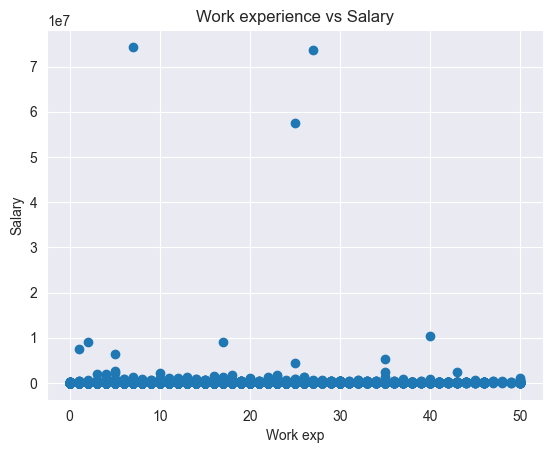

In [232]:
plt.rcParams.update({'font.size': 10})
plt.scatter(x=df['WorkExp'], y=df['Salary'])
plt.title('Work experience vs Salary')
plt.xlabel("Work exp")
plt.ylabel("Salary")
plt.show()

Після видалення екстримальних значень:

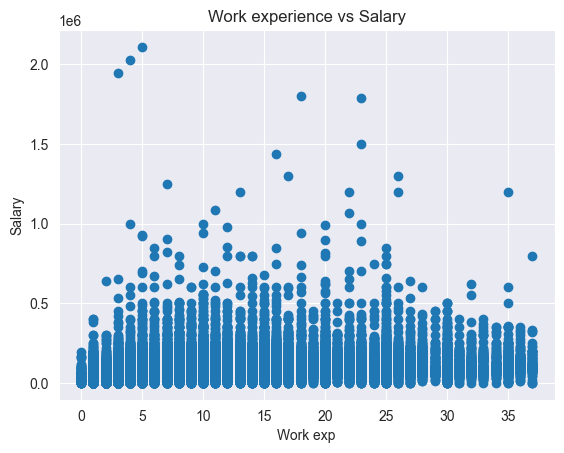

In [233]:
plt.rcParams.update({'font.size': 10})
plt.scatter(x=df_exp['WorkExp'], y=df_exp['Salary'])
plt.title('Work experience vs Salary')
plt.xlabel("Work exp")
plt.ylabel("Salary")
plt.show()

Прогнозування заробітної плати за стажем роботи за допомогою лінійної регресії

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split(df_exp.WorkExp.values.reshape(-1, 1), df_exp.Salary.values, random_state=11)

In [235]:
X_train.shape

(24072, 1)

In [236]:
X_test.shape

(8025, 1)

In [237]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [238]:
lin_reg.coef_

array([2904.49426442])

In [239]:
lin_reg.intercept_

np.float64(59135.90451581779)

In [240]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 152079.72, expected: 270000.00
predicted: 82371.86, expected: 81095.00
predicted: 64944.89, expected: 25701.00
predicted: 70753.88, expected: 826.00
predicted: 79467.36, expected: 63199.00
predicted: 117225.79, expected: 24000.00
predicted: 146270.73, expected: 400000.00
predicted: 79467.36, expected: 161502.00
predicted: 76562.87, expected: 30292.00
predicted: 85276.35, expected: 80317.00
predicted: 96894.33, expected: 91026.00
predicted: 67849.39, expected: 19276.00
predicted: 70753.88, expected: 52046.00
predicted: 117225.79, expected: 120000.00
predicted: 70753.88, expected: 160000.00
predicted: 102703.32, expected: 137770.00
predicted: 96894.33, expected: 37481.00
predicted: 67849.39, expected: 104000.00
predicted: 64944.89, expected: 80690.00
predicted: 91085.34, expected: 27446.00
predicted: 91085.34, expected: 47652.00
predicted: 105607.81, expected: 107091.00
predicted: 105607.81, expected: 170000.00
predicted: 79467.36, expected: 64254.00
predicted: 111416.80, expe

Обчислення середньоквадратичної похибки

In [241]:
mean_squared_error(Y_test, predicted)

7275579147.159793

Обчислення R^2

In [242]:
r2_score(Y_test, predicted)

0.08547028703144754

In [243]:
predict = (lambda x: lin_reg.coef_*x+lin_reg.intercept_)
predict(10)

array([88180.84716002])

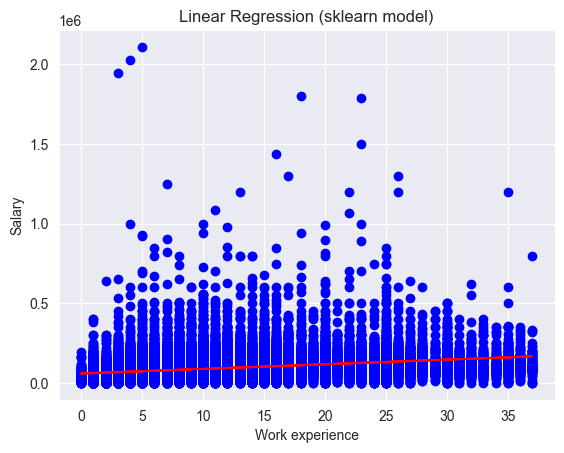

In [244]:
plt.scatter(df_exp['WorkExp'], df_exp['Salary'], color='blue')
y = predict(df_exp['WorkExp'])
plt.plot(df_exp['WorkExp'], y, color='red')
plt.xlabel('Work experience')
plt.ylabel('Salary')
plt.title("Linear Regression (sklearn model)")
plt.show()

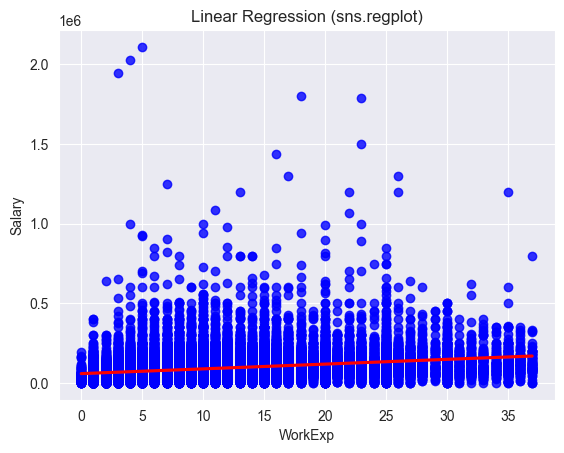

In [245]:
axes = sns.regplot(x=df_exp.WorkExp, y=df_exp.Salary, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()